## Import distinctipy

In [1]:
from distinctipy import distinctipy
from distinctipy import examples
import matplotlib.pyplot as plt
%matplotlib inline

## Generating Colours

Say you have already used red, green, blue, white and black in your application. What should you use next? Distinctipy can help by generating new colours as distinct from red, green, blue, white, black (and each other) as possible.

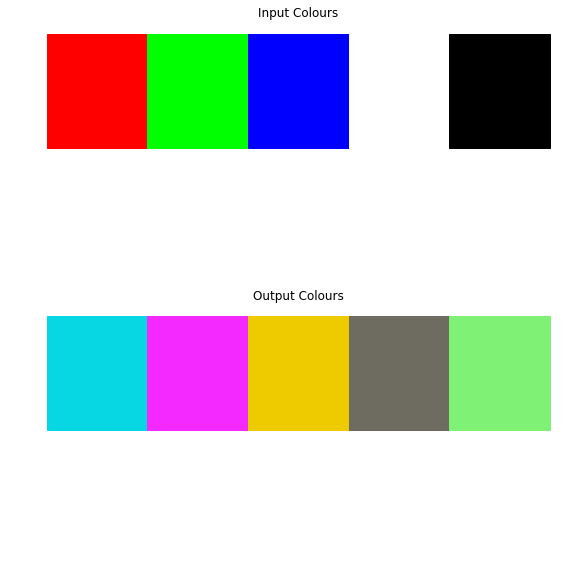

In [2]:
input_colors = [(1,0,0), (0,1,0), (0,0,1), (1,1,1), (0,0,0)]

output_colors = distinctipy.get_colors(5, input_colors)

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
fig.tight_layout()

distinctipy.color_swatch(input_colors, one_row=True, 
                         ax=axes[0], title='Input Colours')

distinctipy.color_swatch(output_colors, one_row=True, 
                         ax=axes[1], title='Output Colours')


## N colours

*distinctipy* can be used to generate N visually distinct colours. A list of colours to avoid can be passed (as in the example above via the parameter exclude_colors), or by default distinctipy.get_colors will avoid black and white.

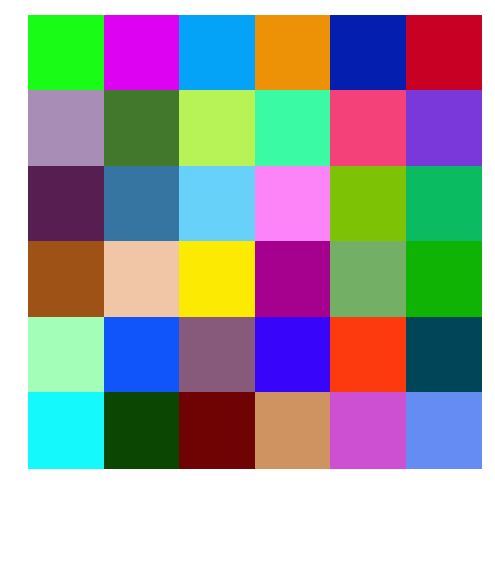

In [3]:
colors = distinctipy.get_colors(36)
distinctipy.color_swatch(colors)

## Pastel Factor

A pastel_factor parameter can be given, in which case paler colours will be generated.

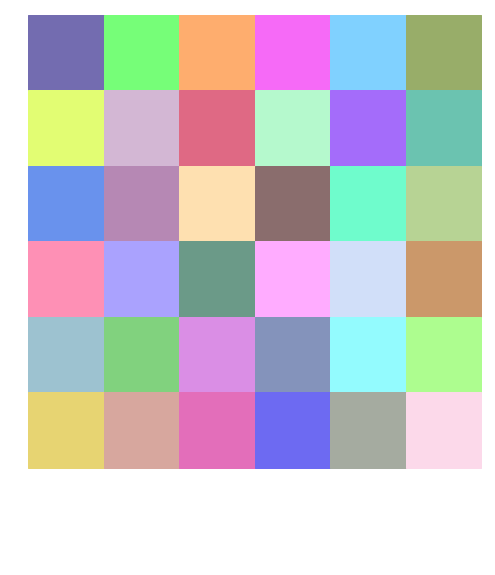

In [4]:
colors = distinctipy.get_colors(36, pastel_factor=0.7)
distinctipy.color_swatch(colors)

## Text and Inverted Colours

*distinctipy* provides functionality to determine whether white or black text should be used over a given background colour, and to invert an input colour (generate the maximally distinct colour from each individual colour in an input list).

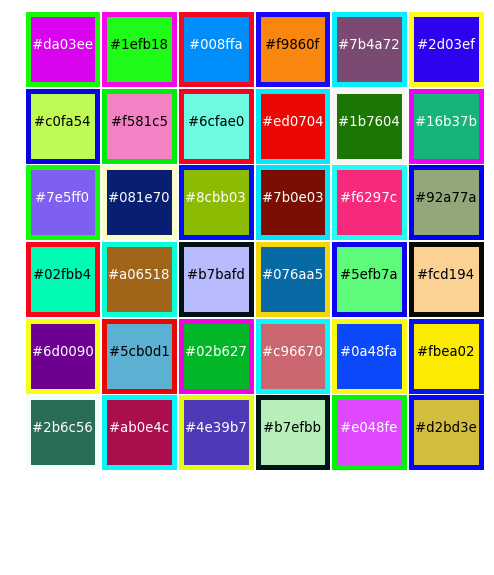

In [5]:
colors = distinctipy.get_colors(36)
inverted = distinctipy.invert_colors(colors)
text = [distinctipy.get_text_color(color) for color in colors]

distinctipy.color_swatch(colors, edgecolors=inverted, show_text=True)

## Compared with Other Colour Maps

*distinctipy* comes with some example datasets (from http://cs.joensuu.fi/sipu/datasets/) which can be used to show how it performs compared to other common colour maps available in matplotlib. Or you can directly compare colour swatches.

*distinctipy* avoids repeating colours, typically uses a wider range of colours, and gives a better/more random ordering of colours.

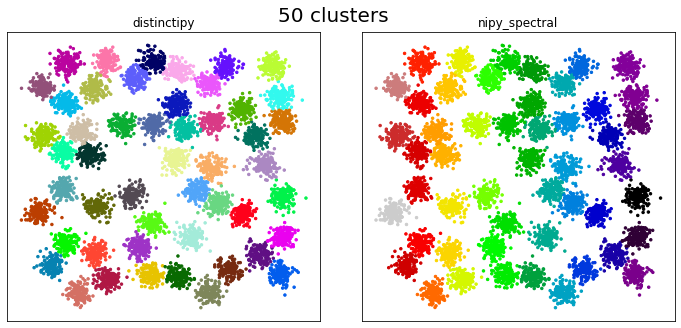

In [6]:
examples.compare_clusters('a3', compare_with='nipy_spectral')

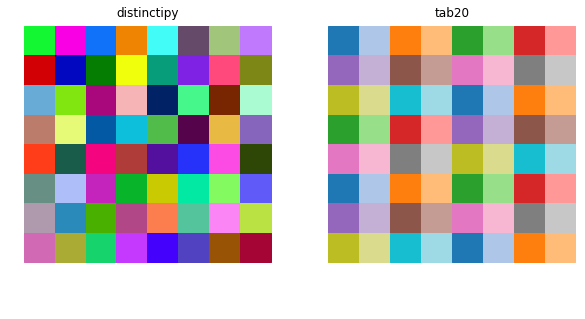

In [7]:
examples.compare_colors(N=64, compare_with='tab20')

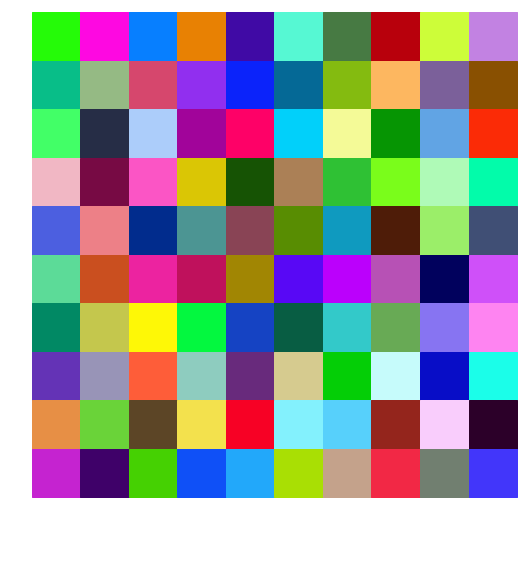

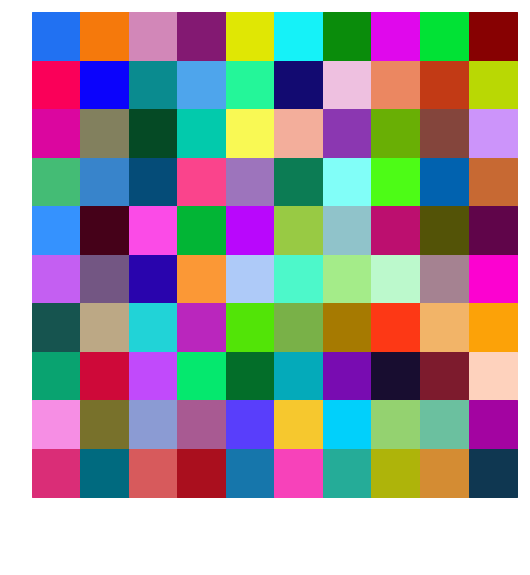

In [61]:
from distinctipy import distinctipy

norm_colors = distinctipy.get_colors(100, colorblind_type=None)
distinctipy.color_swatch(norm_colors)

blind_colors = distinctipy.get_colors(100, colorblind_type='Deuteranomaly')
distinctipy.color_swatch(blind_colors)

Normally generated colours:


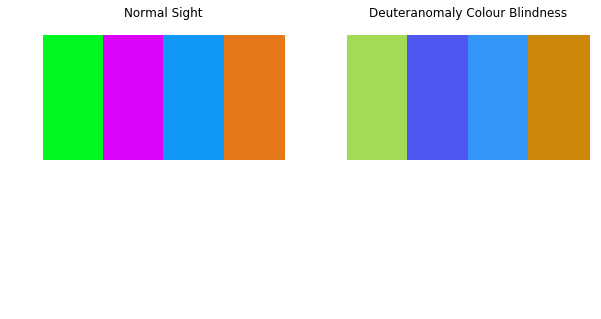

Colours with colorblind improvement:


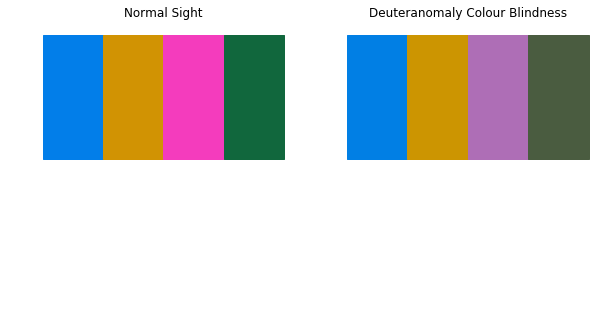

In [60]:
from distinctipy import colorblind

print('Normally generated colours:')
colorblind.simulate_colorblind(norm_colors, colorblind_type='Deuteranomaly', one_row=True)

print('Colours with colorblind improvement:')
colorblind.simulate_colorblind(blind_colors, colorblind_type='Deuteranomaly', one_row=True)